In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Another library for plotting: more advanced features than matplotlib
import seaborn as sns

In [3]:
#csv_path_train ='train.csv'
#csv_path_test ='test.csv'
csv_path_full = 'Titanic_Full.csv'

In [4]:
#titanic_train = pd.read_csv(csv_path_train)
#titanic_test = pd.read_csv(csv_path_test)
titanic_full = pd.read_csv(csv_path_full)


In [5]:
titanic_full.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,0,"Abbing, Mr. Anthony",Male,42,0,0,C.A. 5547,7.55,,S,,,
1,3,0,"Abbott, Master. Eugene Joseph",Male,13,0,2,C.A. 2673,20.25,,S,,,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",Male,16,1,1,C.A. 2673,20.25,,S,,190,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",Female,35,1,1,C.A. 2673,20.25,,S,A,,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",Female,16,0,0,348125,7.65,,S,16,,"Norway Los Angeles, CA"


In [6]:
titanic_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [7]:
titanic_full.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

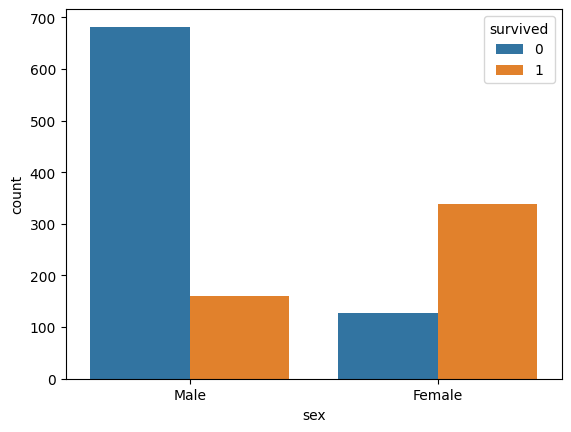

In [8]:
import seaborn as sns
sns.countplot(data=titanic_full, x='sex',hue='survived')

<Axes: xlabel='pclass', ylabel='count'>

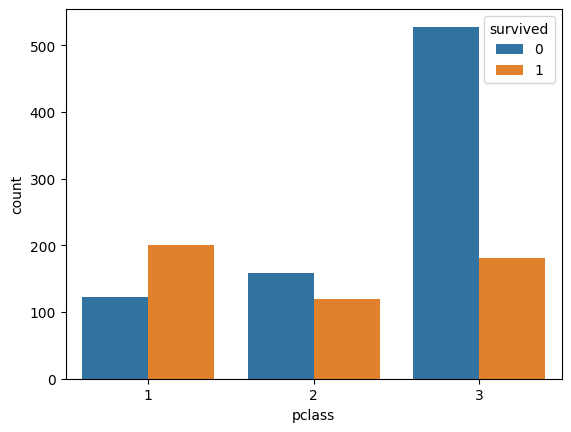

In [9]:
import seaborn as sns
sns.countplot(data=titanic_full, x='pclass',hue='survived')

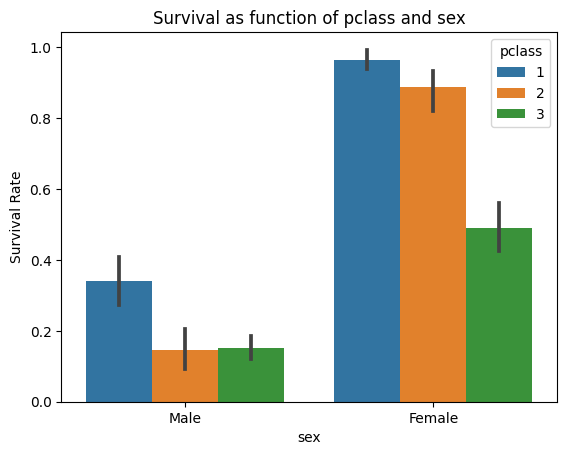

In [10]:
sns.barplot(x='sex', y='survived', hue='pclass', data=titanic_full)
plt.ylabel("Survival Rate")
plt.title("Survival as function of pclass and sex")
plt.show()

<Axes: xlabel='pclass', ylabel='count'>

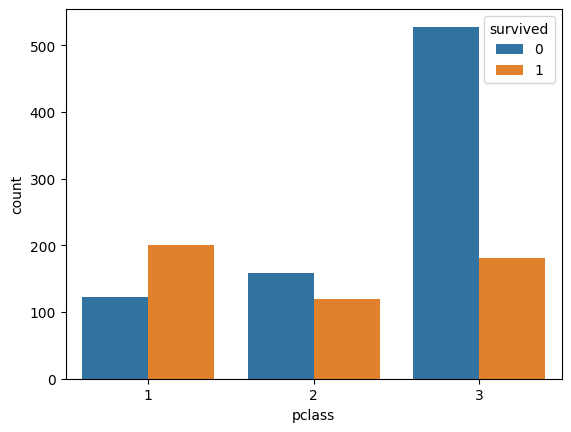

In [11]:
import seaborn as sns
sns.countplot(data=titanic_full, x='pclass',hue='survived')

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
y = titanic_full['survived']
X = titanic_full.drop(['survived', 'name', 'ticket', 'cabin'], axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,3,Male,42,0,0,7.55,S,,,
1,3,Male,13,0,2,20.25,S,,,"East Providence, RI"
2,3,Male,16,1,1,20.25,S,,190,"East Providence, RI"
3,3,Female,35,1,1,20.25,S,A,,"East Providence, RI"
4,3,Female,16,0,0,7.65,S,16,,"Norway Los Angeles, CA"


In [14]:
num_feat = X.select_dtypes('number').columns.values
cat_feat = X.select_dtypes('object').columns.values
X_num = X[num_feat]
X_cat = X[cat_feat]
X_num = X_num.drop(['pclass'], axis=1)

In [15]:
p_class = X["pclass"].values.reshape(-1,1)

In [16]:
enc = OrdinalEncoder()
enc.fit(p_class)
pclass_array = enc.transform(p_class)
X_ord_class = pd.DataFrame(pclass_array, columns = ['pclass'])
X_ord_class.head()

,pclass
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [17]:
# Scaling the numeric features using standardization
X_num = (X_num - X_num.mean()) / X_num.std()
X_num = X_num.fillna(X_num.mean())
X_num.head()

,sibsp,parch
0,-0.478904,-0.444829
1,-0.478904,1.865813
2,0.481104,0.710492
3,0.481104,0.710492
4,-0.478904,-0.444829


In [18]:
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,sex_Female,sex_Male,age_,age_0.1667,age_0.3333,age_0.4167,age_0.6667,age_0.75,age_0.8333,age_0.9167,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = pd.concat([X_num, X_ord_class, X_cat], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 910 entries, sibsp to home.dest_Zurich, Switzerland
dtypes: float64(3), uint8(907)
memory usage: 1.2 MB


In [ ]:
!pip install catboost

In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, precision_score, precision_recall_curve

In [22]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df.loc[:,"seasonal_vaccine"],random_state=42,
#                                                    stratify = labels_df.loc[:,"seasonal_vaccine"], 
#                                                    test_size=0.20)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=60,
                                                    stratify = y, 
                                                    test_size=0.30)

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
# Fitting the model and printing the accuracy score
model = SGDClassifier(loss='log', max_iter=2000, random_state=0) # Random state is fixed for reproducibility
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.9694656488549618

In [25]:
blackbox_model_catboost = CatBoostClassifier(loss_function='Logloss', verbose=False)
blackbox_model_catboost.fit(X_train, y_train)

In [26]:
#Catboost
y_pred_test = blackbox_model_catboost.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.98      0.97      0.97       150

    accuracy                           0.98       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393



In [27]:
# Printing the confusion matrix
#TP: 240, TN: 145, FP: 3, FN: 5
confusion_matrix(y_test, y_pred_test)

array([[240,   3],
       [  5, 145]])

In [214]:
# Printing the precision score for survived passengers
precision_score(y_test, y_pred)

0.96

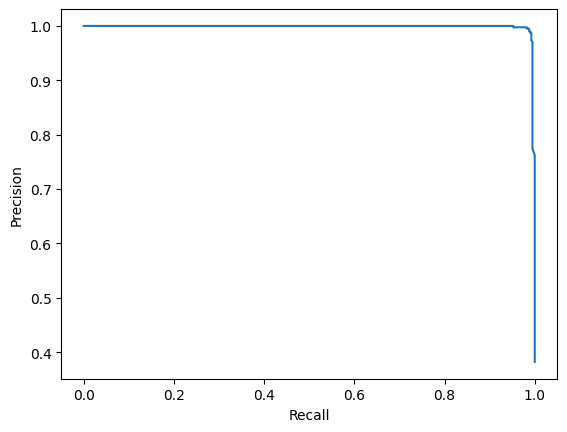

In [216]:
# Plotting the Precision-Recall curve
y_proba_train = blackbox_model_catboost.predict_proba(X_train)[:, 1]
p, r, t = precision_recall_curve(y_train, y_proba_train)

plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()